In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/rocket/anaconda2/h2o_jar/h2o.jar
  Ice root: /tmp/tmpMrg4c7
  JVM stdout: /tmp/tmpMrg4c7/h2o_rocket_started_from_python.out
  JVM stderr: /tmp/tmpMrg4c7/h2o_rocket_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster version:,3.10.0.9
H2O cluster version age:,"1 year, 2 months and 23 days !!!"
H2O cluster name:,H2O_from_python_rocket_wyxl7z
H2O cluster total nodes:,1
H2O cluster free memory:,3.464 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [2]:
data = h2o.import_file(path="../datasets/wine.csv")
data.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:1599
Cols:12




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,real,real,real,real,real,real,real,real,real,real,real,int
mins,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
mean,8.3196372733,0.527820512821,0.270975609756,2.53880550344,0.0874665415885,15.8749218261,46.4677923702,0.996746679174,3.31111319575,0.658148843027,10.4229831144,5.63602251407
maxs,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.0,14.9,8.0
sigma,1.74109631813,0.179059704154,0.194801137405,1.40992805951,0.0470653020101,10.4601569698,32.8953244783,0.00188733395384,0.154386464904,0.16950697959,1.06566758185,0.807569439735
zeros,0,0,132,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0


In [3]:
from h2o.estimators.kmeans import H2OKMeansEstimator
results = [H2OKMeansEstimator(k=clusters, init="Random", seed=2, standardize=True) for clusters in range(2,13)]
for estimator in results:
    estimator.train(x=data.col_names[0:-1], training_frame = data)

kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [4]:
clusters = 4
predicted = results[clusters-2].predict(data)
data["Predicted"] = predicted["predict"].asfactor()

kmeans prediction progress: |█████████████████████████████████████████████| 100%


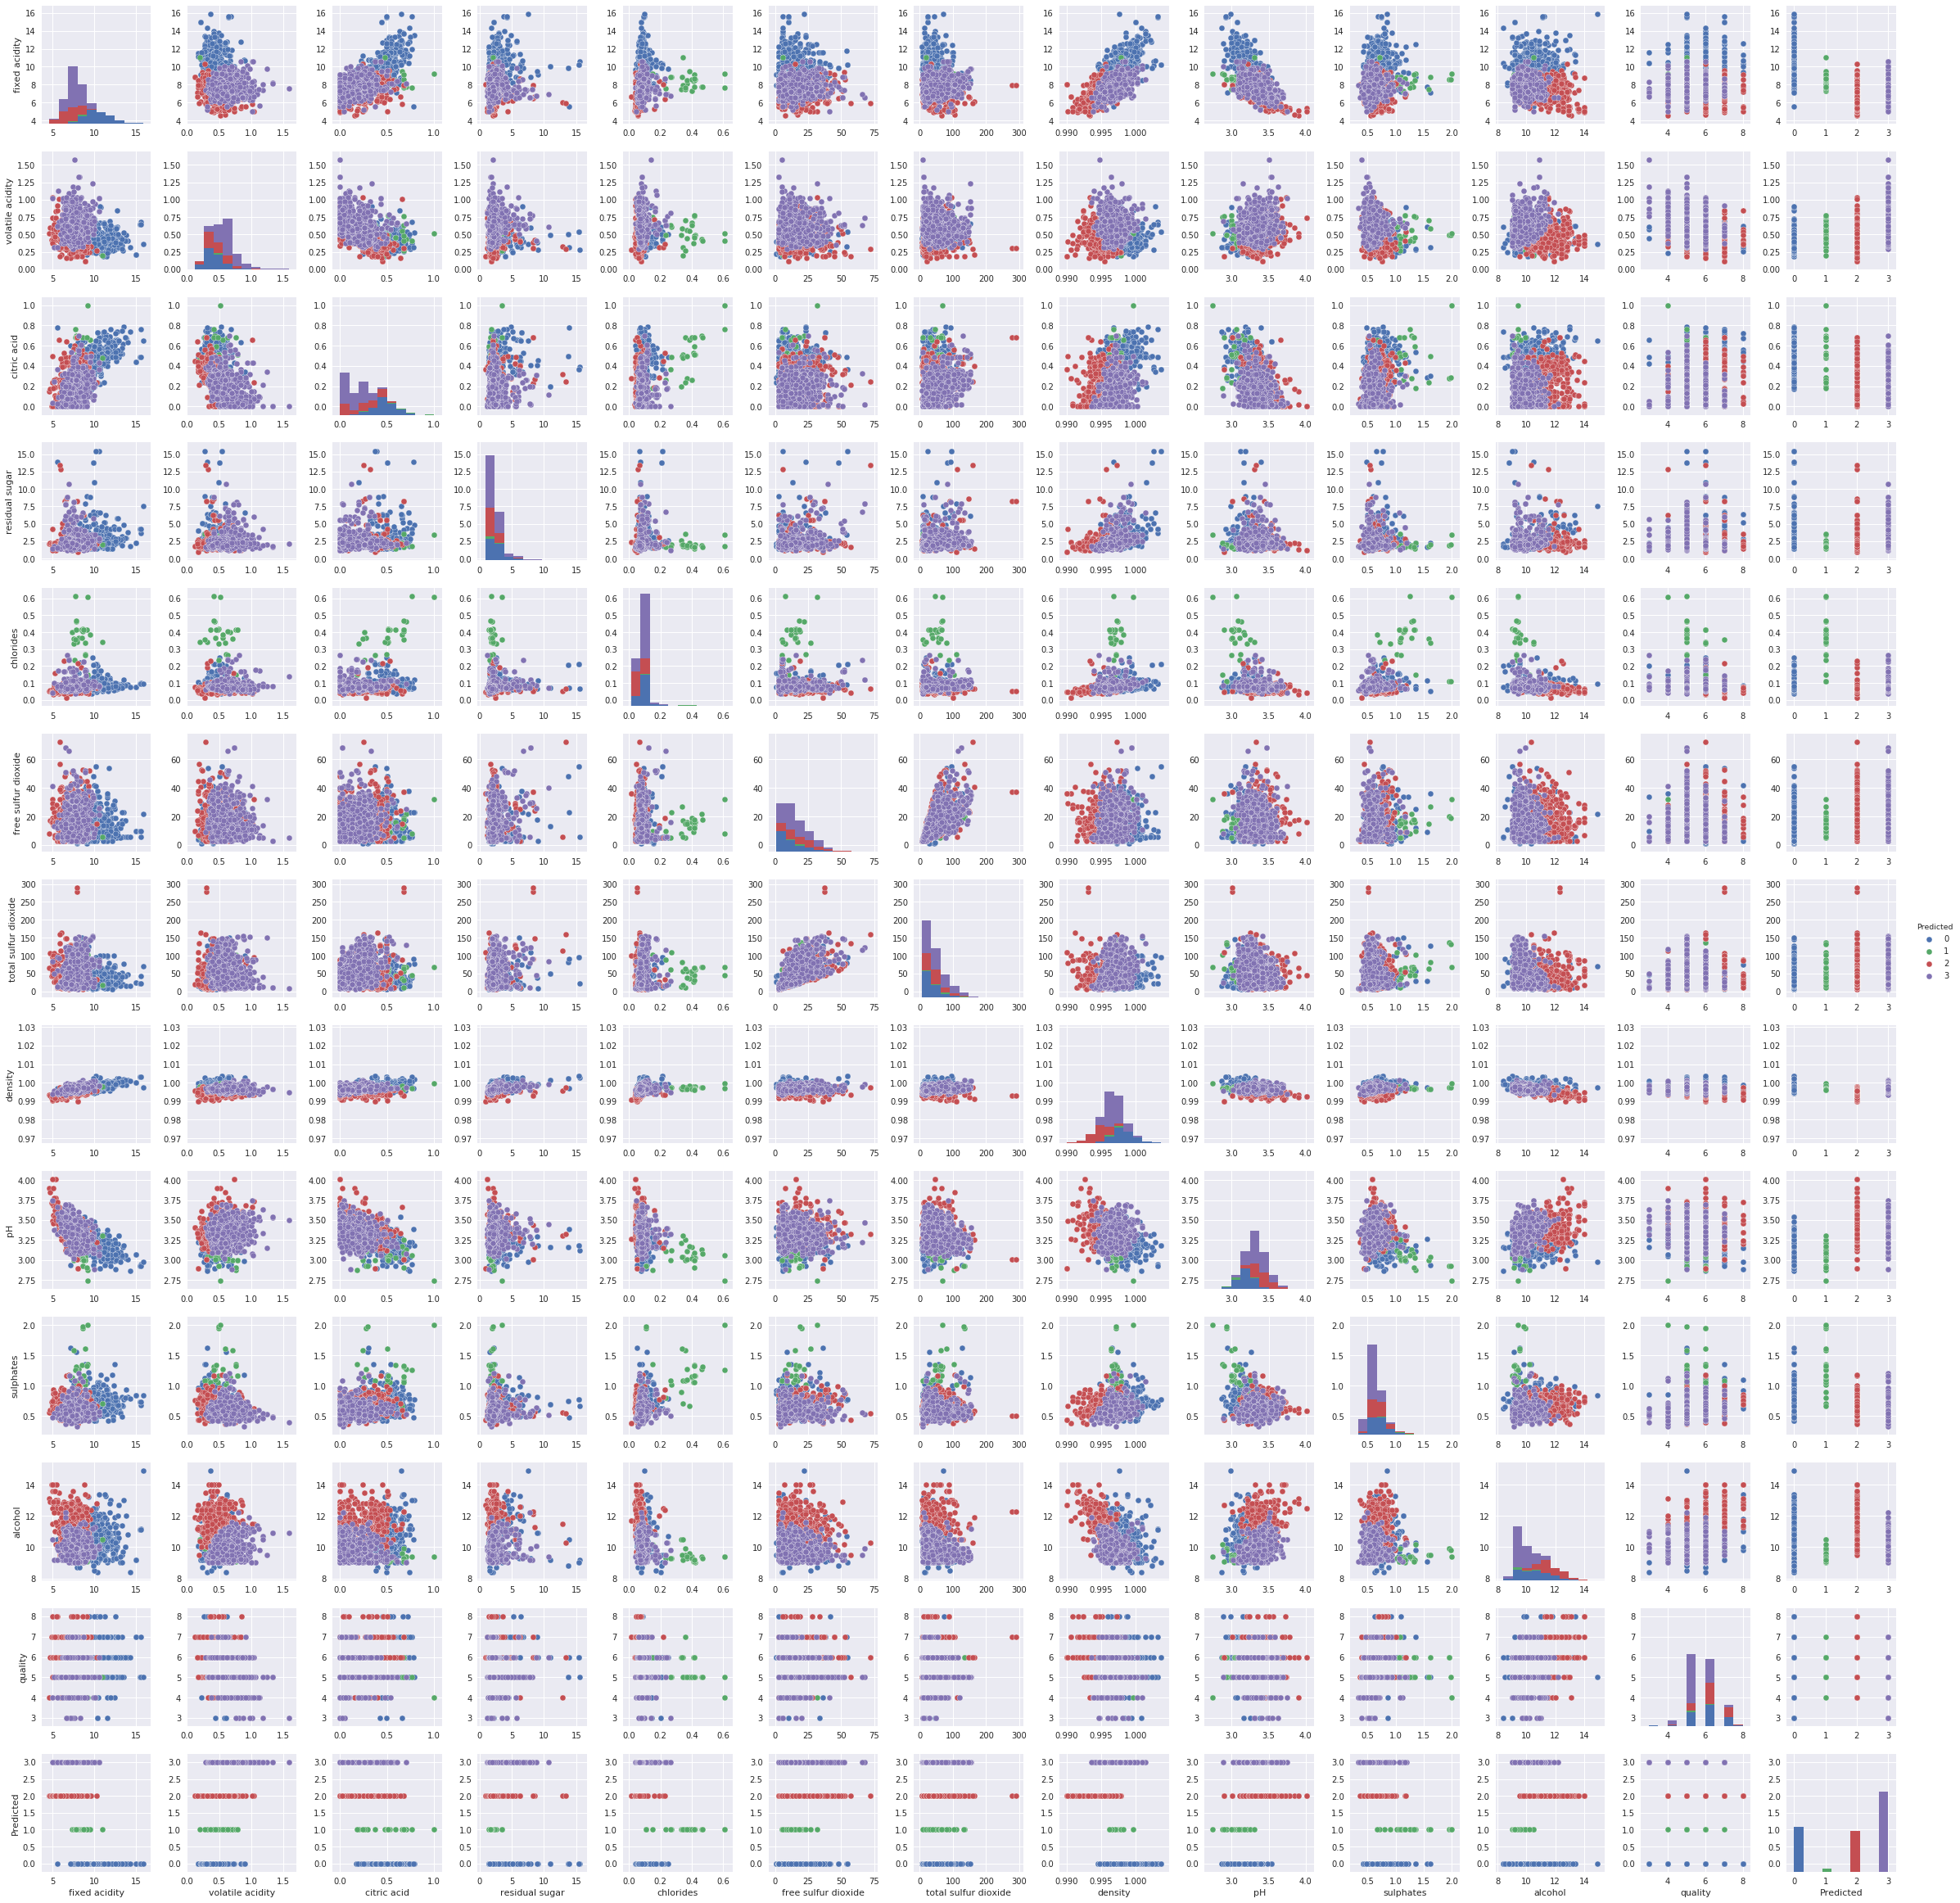

In [5]:
import seaborn as sns
%matplotlib inline
sns.set()
sns.pairplot(data.as_data_frame(True), vars=data.col_names, hue="Predicted");

In [6]:
h2o.shutdown()

H2O session _sid_b675 closed.
